# get_related_sustainability_tweets

In [1]:
from pymongo import MongoClient
client = MongoClient()
db = client.environment
sustainability_collection = db.sustainability

In [2]:
from word_clouds import generate_wordcloud_cluster

<Figure size 1200x1200 with 1 Axes>

<Figure size 1200x1200 with 1 Axes>

<Figure size 1200x1200 with 1 Axes>

In [3]:
import pandas as pd

In [4]:
import pickle

with open('sustainability_clusters.pickle','rb') as read_file:
    nmf_tfidf_clusters = pickle.load(read_file)

In [5]:
with open('vectorized_tfidfdata.pickle','rb') as read_file:
    nmf_tfidf_data = pickle.load(read_file)

In [6]:
with open('tweet_df.pickle','rb') as read_file:
    tweet_df = pickle.load(read_file)

In [7]:
with open('clust_names.pickle','rb') as read_file:
    clust_names = pickle.load(read_file)

In [8]:
with open('clustered_tweets.pickle','rb') as read_file:
    clustered_tweets = pickle.load(read_file)

In [9]:
def get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, idx):
    df = pd.DataFrame(nmf_tfidf_clusters, columns = ['cluster'])
    df = df[df['cluster'] == nmf_tfidf_clusters[idx]]
    
    return(list(df.sample(10).index)) #Returns list of 10 indices with tweets in the same cluster

In [10]:
recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, 30)

In [11]:
clustered_tweets = clustered_tweets.groupby(by = 'clusters', as_index = False).mean()

In [17]:
def print_tweets(idx,recommended_tweets):
    
    #print information on tweets
    print('Tweet:',idx,' \n')
    print('Polarity:',round(tweet_df.loc[idx].polarity,2) )
    print('Subjectivity:',round(tweet_df.loc[idx].subjectivity,2))
    print('\n',sustainability_collection.find()[idx]['text'])
    print('\n------\n')
    
    #print information on cluster
    clust_num = tweet_df.loc[idx].clusters
    cluster_name = clust_names.loc[clust_num].clust_names
    print('Cluster Name:',clust_num, cluster_name, '\n')
    print('Cluster Polarity:', round(clustered_tweets[clustered_tweets.clusters == clust_num].polarity[clust_num],2))
    print('Cluster Subjectivity:', round(clustered_tweets[clustered_tweets.clusters == clust_num].subjectivity[clust_num],2))
    
    #generate word cloud
    generate_wordcloud_cluster(clust_num)
    
    #recommend 10 additional tweets in cluster
    for rec_idx in recommended_tweets:
        print('\n --- Result --- \n')
        print(sustainability_collection.find()[rec_idx]['text'])

In [18]:
def show_tweet_info(index_num):
    recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, index_num)
    print_tweets(index_num, recommended_tweets)

Tweet: 1  

Polarity: 0.5
Subjectivity: 0.9

 Are you in Melbourne or Sydney? Join us at #SPFAustralia to learn about the latest trends in #EHS, #RiskManagement… https://t.co/BG7eWM1FCO

------

Cluster Name: 12 Climate Change 

Cluster Polarity: 0.13
Cluster Subjectivity: 0.32


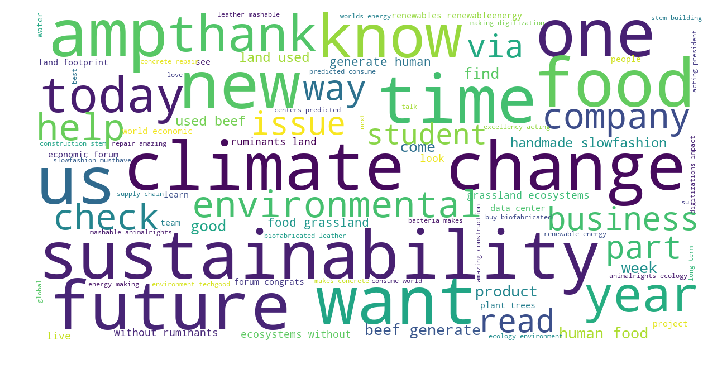


 --- Result --- 

Are you interested in #sustainability or #communitydevelopment? Register with #TEP today and be a part of our inten… https://t.co/cblCBP98wf

 --- Result --- 

RT @abdakhan5: I just finished my first panel session @YouthopiaInPak #youth #summit #Karachi on #sustainability fantastic audience partici…

 --- Result --- 

RT @drsplace: Some of the land “used” for beef. We cannot generate human food from grassland ecosystems without ruminants. A land footprint…

 --- Result --- 

RT @impakterdotcom: Another approach towards #fashion –  Ramblers way: american apparel - by @mohamad_akef for Impakter https://t.co/02LSFG…

 --- Result --- 

Meet Grace Nosek. She researches how law can be used to protect #ClimateScience against manufactured doubt, and lov… https://t.co/IgK1KHkwhM

 --- Result --- 

New blog post: Design-oriented thinking (and #sustainability) in #earlymusic. #design #music https://t.co/FKmBaXCiuS

 --- Result --- 

"If you don't know where your food is coming 

In [21]:
show_tweet_info(1)